In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import seaborn

<Axes: xlabel='ideologia_binaria', ylabel='count'>

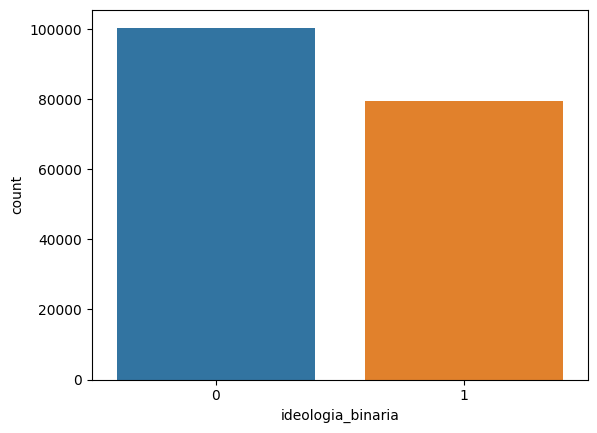

In [34]:
data = pd.read_csv("politicES.csv")
#Contar la ideologia izquierda
"""
iz_count = data["ideologia_binaria"].value_counts()[0]
# Contar la ideologia derecha
der_count = data["ideologia_binaria"].value_counts()[1]
print("ideologia izquierda: ", iz_count)
print("ideologia derecha: ", der_count)
"""
seaborn.countplot(x=data["ideologia_binaria"])

<Axes: xlabel='ideologia_binaria', ylabel='count'>

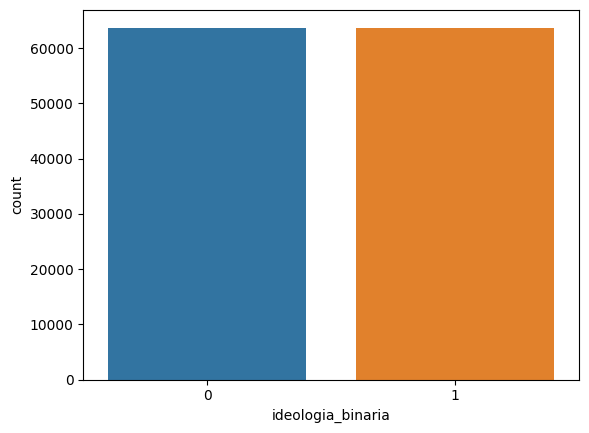

In [35]:
x = data['tweets']
y = data['ideologia_binaria']
# Se divide el conjunto de entrenamiento y de orueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Se crea una instancia de TfidfVectorizer() y se asigna a la variable vectorized
vectorized = TfidfVectorizer(ngram_range=(1,3))
c_vectorized = CountVectorizer()
# x_train_tfidf se obtiene al aplicar el método fit_transform() de vectorized a los datos de entrenamiento x_train
x_train_tfidf = c_vectorized.fit_transform(x_train)
x_test_tfidf = c_vectorized.transform(x_test)

# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_underTFIDF_ide, y_underTFIDF_ide = undersampler.fit_resample(x_train_tfidf, y_train)

seaborn.countplot(x = y_underTFIDF_ide)

In [36]:
# Se crea una instancia de LabelEncoder() y se asigna a la variable le.
lr_model = LogisticRegression(max_iter=700)
# Se ajustan los datos al modelo
lr_model.fit(X_underTFIDF_ide, y_underTFIDF_ide)
# Se utiliza el modelo ya ajustado para predecir los tatos de prueba y se evalua
#lr_score = lr_model.score(x_test_tfidf,y_test)
# Se imprime la presición del modelo
#print(f'Accuracy Regresión Logística: {lr_score}')

#Se crea un objeto KFold con 5 divisiones (n_splits=5) que se utilizará para dividir los datos en 5 conjuntos diferentes
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Se aplica la validación cruzada al modelo de regresión logística
lr_scores = cross_val_score(lr_model, X_underTFIDF_ide, y_underTFIDF_ide, cv=kf)
# Imprimimos los resultados de la validación cruzada
print(f"k-fold cross-validation LR: {np.mean(lr_scores)*100:.4f}%")

k-fold cross-validation LR: 67.6382%
